In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
games = pd.read_csv('/Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project1_baseball/games/games.csv')
info = pd.read_csv('/Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project1_baseball/games/info.csv')
events = pd.read_csv('/Users/thanhnguyen/Desktop/Data_analysis/DE_k2/project1_baseball/games/events.csv')


In [3]:
games.head()

,type,multi2,multi3,multi4,multi5,multi6,event,game_id,year
0,id,ALS193307060,NaN,NaN,NaN,NaN,NaN,ALS193307060,1933
1,version,1,NaN,NaN,NaN,NaN,NaN,ALS193307060,1933
2,info,inputprogvers,version 7RS(19) of 07/07/92,NaN,NaN,NaN,NaN,ALS193307060,1933
3,info,visteam,NLS,NaN,NaN,NaN,NaN,ALS193307060,1933
4,info,hometeam,ALS,NaN,NaN,NaN,NaN,ALS193307060,1933


In [4]:
info.head()

,year,game_id,team,defense
0,1933,ALS193307060,0,ALS
1,1933,ALS193307060,1,NLS
2,1934,NLS193407100,0,NLS
3,1934,NLS193407100,1,ALS
4,1935,ALS193507080,0,ALS


In [5]:
events.head()

,year,game_id,team,event_type,count
0,1933,ALS193307060,0,H,7
1,1933,ALS193307060,0,HR,1
2,1933,ALS193307060,0,SO,4
3,1933,ALS193307060,1,BB,6
4,1933,ALS193307060,1,H,8


In [6]:
#task2
plays = games.query("type == 'play' and event != 'NP'")
plays.head()

,type,multi2,multi3,multi4,multi5,multi6,event,game_id,year
53,play,1,0,martp103,NaN,NaN,63,ALS193307060,1933
54,play,1,0,frisf101,NaN,NaN,63/G6D,ALS193307060,1933
55,play,1,0,kleic101,NaN,NaN,6/L,ALS193307060,1933
56,play,1,1,chapb102,NaN,NaN,53,ALS193307060,1933
57,play,1,1,gehrc101,NaN,NaN,W,ALS193307060,1933


In [7]:
#task3
plays.columns =['type', 'inning', 'team', 'player', 'count', 'pitches', 'event', 'game_id', 'year']

In [8]:
#task4
pa = plays.loc[plays['player'].shift() != plays['player'], ['year', 'game_id', 'inning', 'team', 'player']]

In [9]:
pa.head()

,year,game_id,inning,team,player
53,1933,ALS193307060,1,0,martp103
54,1933,ALS193307060,1,0,frisf101
55,1933,ALS193307060,1,0,kleic101
56,1933,ALS193307060,1,1,chapb102
57,1933,ALS193307060,1,1,gehrc101


In [10]:
#task 5
pa = pa.groupby(['year', 'game_id', 'team']).size().reset_index(name='PA')
pa.head()

,year,game_id,team,PA
0,1933,ALS193307060,0,34
1,1933,ALS193307060,1,38
2,1934,NLS193407100,0,48
3,1934,NLS193407100,1,39
4,1935,ALS193507080,0,33


In [11]:
#task 6
events = events.set_index(['year', 'game_id', 'team', 'event_type'])

In [12]:
events.head()

count
year game_id      team event_type       
1933 ALS193307060 0    H               7
                       HR              1
                       SO              4
                  1    BB              6
                       H               8

In [13]:
events.unstack()


count                               
event_type                BB    E     H  HBP   HR  RO    SO
year game_id      team                                     
1933 ALS193307060 0      NaN  NaN   7.0  NaN  1.0 NaN   4.0
                  1      6.0  NaN   8.0  NaN  1.0 NaN   4.0
1934 NLS193407100 0      8.0  NaN  14.0  NaN  NaN NaN  12.0
                  1      3.0  1.0   7.0  NaN  2.0 NaN   5.0
1935 ALS193507080 0      2.0  NaN   5.0  NaN  NaN NaN   5.0
...                      ...  ...   ...  ...  ...  ..   ...
2016 ALS201607120 1      3.0  1.0   6.0  NaN  2.0 NaN   5.0
2017 NLS201707110 0      1.0  NaN  11.0  NaN  1.0 NaN  15.0
                  1      7.0  NaN   7.0  NaN  1.0 NaN   9.0
2018 NLS201807170 0      4.0  NaN   8.0  NaN  5.0 NaN  13.0
                  1      6.0  NaN   2.0  1.0  5.0 NaN  12.0

[178 rows x 7 columns]

In [14]:
#task7
events = events.unstack().fillna(0).reset_index()
events

year       game_id team count                                
event_type                             BB    E     H  HBP   HR   RO    SO
0           1933  ALS193307060    0   0.0  0.0   7.0  0.0  1.0  0.0   4.0
1           1933  ALS193307060    1   6.0  0.0   8.0  0.0  1.0  0.0   4.0
2           1934  NLS193407100    0   8.0  0.0  14.0  0.0  0.0  0.0  12.0
3           1934  NLS193407100    1   3.0  1.0   7.0  0.0  2.0  0.0   5.0
4           1935  ALS193507080    0   2.0  0.0   5.0  0.0  0.0  0.0   5.0
..           ...           ...  ...   ...  ...   ...  ...  ...  ...   ...
173         2016  ALS201607120    1   3.0  1.0   6.0  0.0  2.0  0.0   5.0
174         2017  NLS201707110    0   1.0  0.0  11.0  0.0  1.0  0.0  15.0
175         2017  NLS201707110    1   7.0  0.0   7.0  0.0  1.0  0.0   9.0
176         2018  NLS201807170    0   4.0  0.0   8.0  0.0  5.0  0.0  13.0
177         2018  NLS201807170    1   6.0  0.0   2.0  1.0  5.0  0.0  12.0

[178 rows x 10 columns]

In [15]:
#task8
events.columns = events.columns.droplevel()
events.columns = ['year', 'game_id', 'team', 'BB', 'E', 'H', 'HBP', 'HR', 'ROE', 'SO']

events = events.rename_axis(None, axis='columns')
events.head()

,year,game_id,team,BB,E,H,HBP,HR,ROE,SO
0,1933,ALS193307060,0,0.0,0.0,7.0,0.0,1.0,0.0,4.0
1,1933,ALS193307060,1,6.0,0.0,8.0,0.0,1.0,0.0,4.0
2,1934,NLS193407100,0,8.0,0.0,14.0,0.0,0.0,0.0,12.0
3,1934,NLS193407100,1,3.0,1.0,7.0,0.0,2.0,0.0,5.0
4,1935,ALS193507080,0,2.0,0.0,5.0,0.0,0.0,0.0,5.0


In [32]:
#task 9
pa['year'] = pa['year'].astype(str)
events['year'] = events['year'].astype(str)
pa['team'] = pa['team'].astype(int)
events_plus_pa = pd.merge(events, pa, on=['year', 'game_id', 'team'], how='outer')
events_plus_pa.head()

,year,game_id,team,BB,E,H,HBP,HR,ROE,SO,PA
0,1933,ALS193307060,0,0.0,0.0,7.0,0.0,1.0,0.0,4.0,34
1,1933,ALS193307060,1,6.0,0.0,8.0,0.0,1.0,0.0,4.0,38
2,1934,NLS193407100,0,8.0,0.0,14.0,0.0,0.0,0.0,12.0,48
3,1934,NLS193407100,1,3.0,1.0,7.0,0.0,2.0,0.0,5.0,39
4,1935,ALS193507080,0,2.0,0.0,5.0,0.0,0.0,0.0,5.0,33


In [33]:
#check type of column to merge, it requires the same data type
print(pa.dtypes)
print(events.dtypes)

year       object
game_id    object
team        int64
PA          int64
dtype: object
year        object
game_id     object
team         int64
BB         float64
E          float64
H          float64
HBP        float64
HR         float64
ROE        float64
SO         float64
dtype: object


In [38]:
#task10

events_plus_pa['year'] = events_plus_pa['year'].astype(int)
defense = pd.merge(events_plus_pa, info)
defense.head()


,year,game_id,team,BB,E,H,HBP,HR,ROE,SO,PA,defense
0,1933,ALS193307060,0,0.0,0.0,7.0,0.0,1.0,0.0,4.0,34,ALS
1,1933,ALS193307060,1,6.0,0.0,8.0,0.0,1.0,0.0,4.0,38,NLS
2,1934,NLS193407100,0,8.0,0.0,14.0,0.0,0.0,0.0,12.0,48,NLS
3,1934,NLS193407100,1,3.0,1.0,7.0,0.0,2.0,0.0,5.0,39,ALS
4,1935,ALS193507080,0,2.0,0.0,5.0,0.0,0.0,0.0,5.0,33,ALS


In [39]:
#check type of column to merge, it requires the same data type
print(events_plus_pa.dtypes)
print(info.dtypes)

year         int64
game_id     object
team         int64
BB         float64
E          float64
H          float64
HBP        float64
HR         float64
ROE        float64
SO         float64
PA           int64
dtype: object
year        int64
game_id    object
team        int64
defense    object
dtype: object


In [42]:
# Task 11
defense['DER'] = 1 - ((defense['H'] + defense['ROE']) / (defense['PA'] - defense['BB'] - defense['SO'] - defense['HBP'] - defense['HR']))
defense.loc[:, 'year'] = pd.to_numeric(defense.loc[:, 'year'])

In [46]:
#task 12

der = defense.loc[defense['year'] >= 1978, ['year', 'defense', 'DER']]
der = der.pivot(index='year', columns='defense', values='DER')


In [52]:
der.head()

defense,ALS,NLS
year,,
1978,0.62963,0.666667
1979,0.70000,0.709677
1980,0.62500,0.650000
1981,0.72000,0.607143
1982,0.62963,0.608696


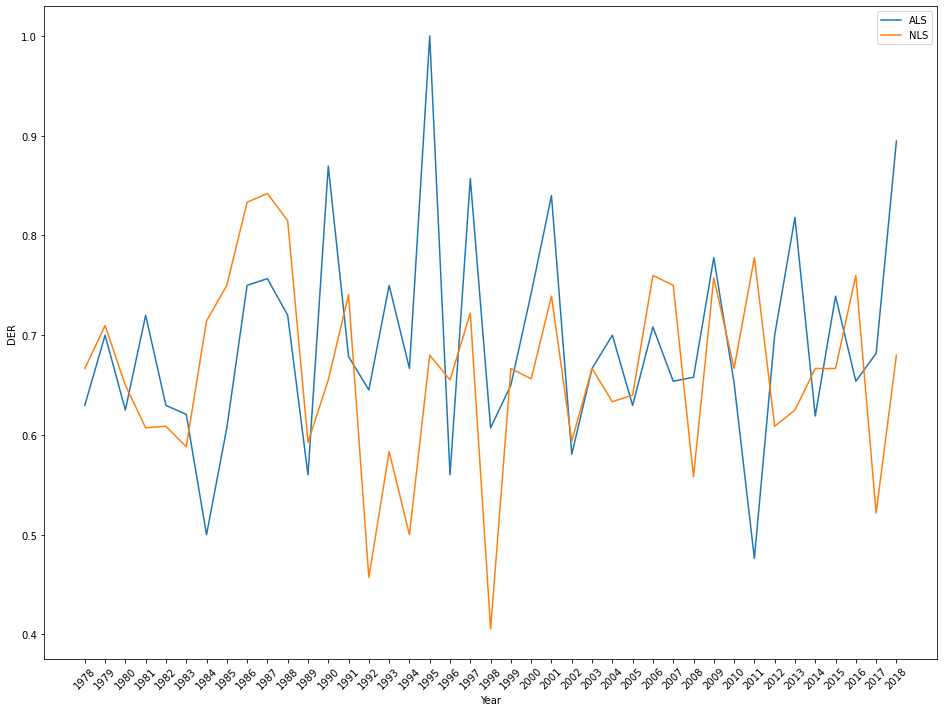

In [54]:
#task 13
plt.figure(figsize=(16, 12))
plt.plot(der.index, der['ALS'], label='ALS')
plt.plot(der.index, der['NLS'], label='NLS')
plt.xticks(der.index, rotation=45)
plt.xlabel('Year')
plt.ylabel('DER')
plt.legend()
plt.show()